<a href="https://colab.research.google.com/github/MrJellimann/machine_learning_homework/blob/master/HW2_Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Christopher Walen, COP 4630, Fall 2019**

*Problem 1*

Come up with handcrafted features for the MNIST digit classificiation problem and use them in a simple model consisting of a single dense layer with softmax activation.

Let x be the matrix representing a image of a MNIST digit. Let vec(x) denote the flattened matrix x.

Your baseline model is the simple model that takes only vec(x) as input. The goal is to improve the accuracy of the simple model by augmenting the input vec(x) with hand-crafted features.

Say, f1, f2, ..., fm are your hand-crafted features. The augmented input vector is then obtained by stacking vec(x) and the vector (f1, f2, ..., fm). You can use the numpy command np.concatentate to stack vectors.

The features could be:

width of digit (normalized to be in the range (0, 1)
height of digit (normalized to be in the range (0, 1)
number of white regions (a typical 8 has three, a typical 6 has two components, and 2 has 1), average intensity, etc.
note the you can one-hot encode the number of connected components as follows: b1 = 1 iff num = 1, b2 = 1 if num = 2, b3 = 1 if num = 3, and b = 1 if num = 0 or num >= 4 (the latter case should normally not occur for well-formed digits); this is probably better than have just a single feature num / 3.
The problem of computing the number of independent white regions is a basic problem for job interviews. It boils down to computing connected components of the following graph. The vertices of the graph correspond to the pixels and are denoted by (i, j), which is the position of the pixel. Two vertices (i, j) and (i', j') are connected iff |i - i'| <= 1 and |j - j'| <= 1. If a pixel at position (i, j) is black, then remove it together with its edges.

You have to compute the number of connected components for the 60 thousand images. So make sure that your code is efficient.

## **New Version - more accurate**

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.2607 - acc: 0.9250 - val_loss: 0.1724 - val_acc: 0.9425
Epoch 2/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1076 - acc: 0.9682 - val_loss: 0.1022 - val_acc: 0.9698
Epoch 3/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.0716 - acc: 0.9788 - val_loss: 0.0780 - val_acc: 0.9753
Epoch 4/50
60000/60000 [=========================

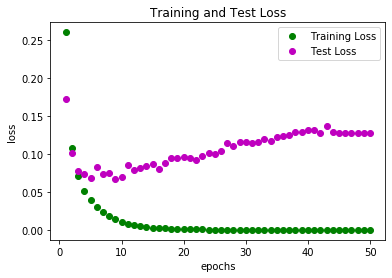

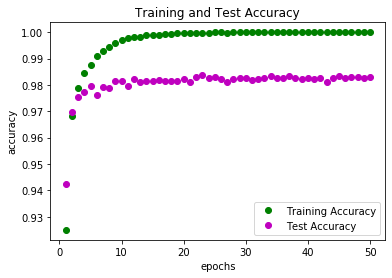

In [19]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math as m

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import to_categorical
from keras import models
from keras import layers

# Set up our mnist data set
(train_images_orig, train_labels_orig), (test_images_orig, test_labels_orig) = mnist.load_data()

# Set up the training images and normalize them
train_images = train_images_orig.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255 # normalize training pictures

# Set up the testing images and normalize them
test_images = test_images_orig.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255 # normalize testing pictures

train_labels = to_categorical(train_labels_orig)
test_labels = to_categorical(test_labels_orig)

# Start our neural network for the size of data we'll be using (28x28 pictures)
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50
history = network.fit(train_images, train_labels, epochs=epochs, batch_size=128, validation_data=(test_images, test_labels))

history_dict = history.history
loss = history_dict['loss']
test_loss = history_dict['val_loss']
epochs_range = range(1, epochs+1)

# View the results of the training's loss
plt.plot(epochs_range, loss, 'go', label='Training Loss')
plt.plot(epochs_range, test_loss, 'mo', label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Grab the accuracy stats and view those as well
acc = history_dict['acc']
test_acc = history_dict['val_acc']

plt.plot(epochs_range, acc, 'go', label='Training Accuracy')
plt.plot(epochs_range, test_acc, 'mo', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



## **Old Version - tried to do it manually**

In [0]:
### Old Code that kind of worked ###

# from keras.datasets import mnist
# # import keras as k
# import numpy as np
# import math as m

# import matplotlib.pyplot as plt

# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# # mp.matrix.flatten(target_matrix)

# # width, height, intensity, white_spaces

# # for each damn pixel in the image
# # if (pixel.intensity > 0)
# # add to total_intensity, add to intense_count
# # grab lowest pixel on x and y, grab highest on x and y

# # after for_loop, divide total_intensity by count and store in vector
# # width = high_x - low_x
# # height = high_y - low_y

# features = []

# #for i in range(len(train_images)):
# for i in range(100):
#   target_matrix = np.matrix(train_images[i])

#   flat_mat = []
  
#   # for row in range(28):
#     # for col in range(28):
#       # flat_mat.append(target_matrix[row, col]) # as.vector(t(target_matrix))
#       # plt.plot(i, target_matrix[row, col], "b.")

#   flat_mat = np.ndarray.flatten(target_matrix)

#   hc_vec = [] # three hand-crafted values
#   total_intensity = 0
#   intense_count = 0
#   low_x = 28
#   high_x = 0
#   low_y = 28
#   high_y = 0

#   # for j in range(len(flat_mat)):
#   for j in range(flat_mat.size):
#     if (flat_mat.flat[j] > 0):
#         total_intensity += flat_mat.flat[j]
#         intense_count += 1

#         if (m.floor(j/28) < low_y):
#           low_y = m.floor(j/28)
#         if (m.floor(j/28) > high_y):
#           high_y = m.floor(j/28)
#         if (j%28 < low_x):
#           low_x = j%28
#         if (j%28 > high_x):
#           high_x = j%28

#   #flat_mat.append((high_x - low_x) / 28) # width
#   np.append(flat_mat, (high_x - low_x)/28)
#   plt.plot(i, (high_x-low_x)/28, "y.")
#   #flat_mat.append((high_y - low_y) / 28) # height
#   plt.plot(i, (high_y-low_y)/28, "r.")
#   #flat_mat.append(total_intensity / intense_count) # intensity
#   if (intense_count > 0):
#     plt.plot(i, total_intensity/intense_count, "g.")
#   else:
#     plt.plot(i, 0, "g.")

#   # flat_mat.append(hc_vec)
  
#   #for b in range(len(flat_mat)):
#    # plt.quiver(i, flat_mat[b])
#   # plt.quiver(i, 1)
  
#   # plt.show()

#   features.append(flat_mat)
#   print("Finished: "+str(i))


# # dense_layer = k.layers.Dense(units=features, input_shape=(60000, 28*28))
# # dropout = k.layers.Dropout(rate=0.1)
# # logits = k.layers.Dense(units=dropout)
# # softmax = k.layers.Softmax(logits)

# # model = k.Sequential(softmax.output, name="Question 1")
# # for i in range(len(features)):
#   # for j in range(len(features[i])):
#     # plt.plot(i, features[i][j], "b.")

# # plt.plot(model.output)
# plt.show()
